# Cargar librerías

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# **Carga y exploración inicial del dataset**

## Cargar el fichero housing.csv en un DataFrame de pandas.

In [34]:
# df = pd.read_csv('housing.csv')

import os
from pathlib import Path

ROOT = Path(os.getenv("PYTHONPATH"))

data = ROOT / "data" / "housing.csv"

df = pd.read_csv(data)

## Inspeccionar las primeras filas, tipos de datos, número de filas y columnas.

In [35]:
print('Exploramos las cabeceras:\n')
print(df.head())

print('\nInformación general: \n')
print(df.info())

Exploramos las cabeceras:

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Información general: 

<class 'pandas.core.fram

## Comprobar si hay valores ausentes en alguna columna.
Identificar qué columnas son numéricas y cuál es categórica (ocean_proximity).

In [36]:
print('Valores nulos: \n')
print(df.isnull().sum())

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("\nColumnas numéricas:", num_cols.tolist())

cat_cols = df.select_dtypes(include=['object', 'category']).columns
print("\nColumnas categóricas:", cat_cols.tolist())


Valores nulos: 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Columnas numéricas: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

Columnas categóricas: ['ocean_proximity']


# **Análisis exploratorio de datos (EDA)**

## Calcular estadísticas descriptivas de las variables numéricas.

In [37]:
print('Estadísticas descriptivas de las variables numéricas:\n')
print(df.describe())

Estadísticas descriptivas de las variables numéricas:

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.0000

## Representar histogramas de las variables numéricas para observar su distribución.

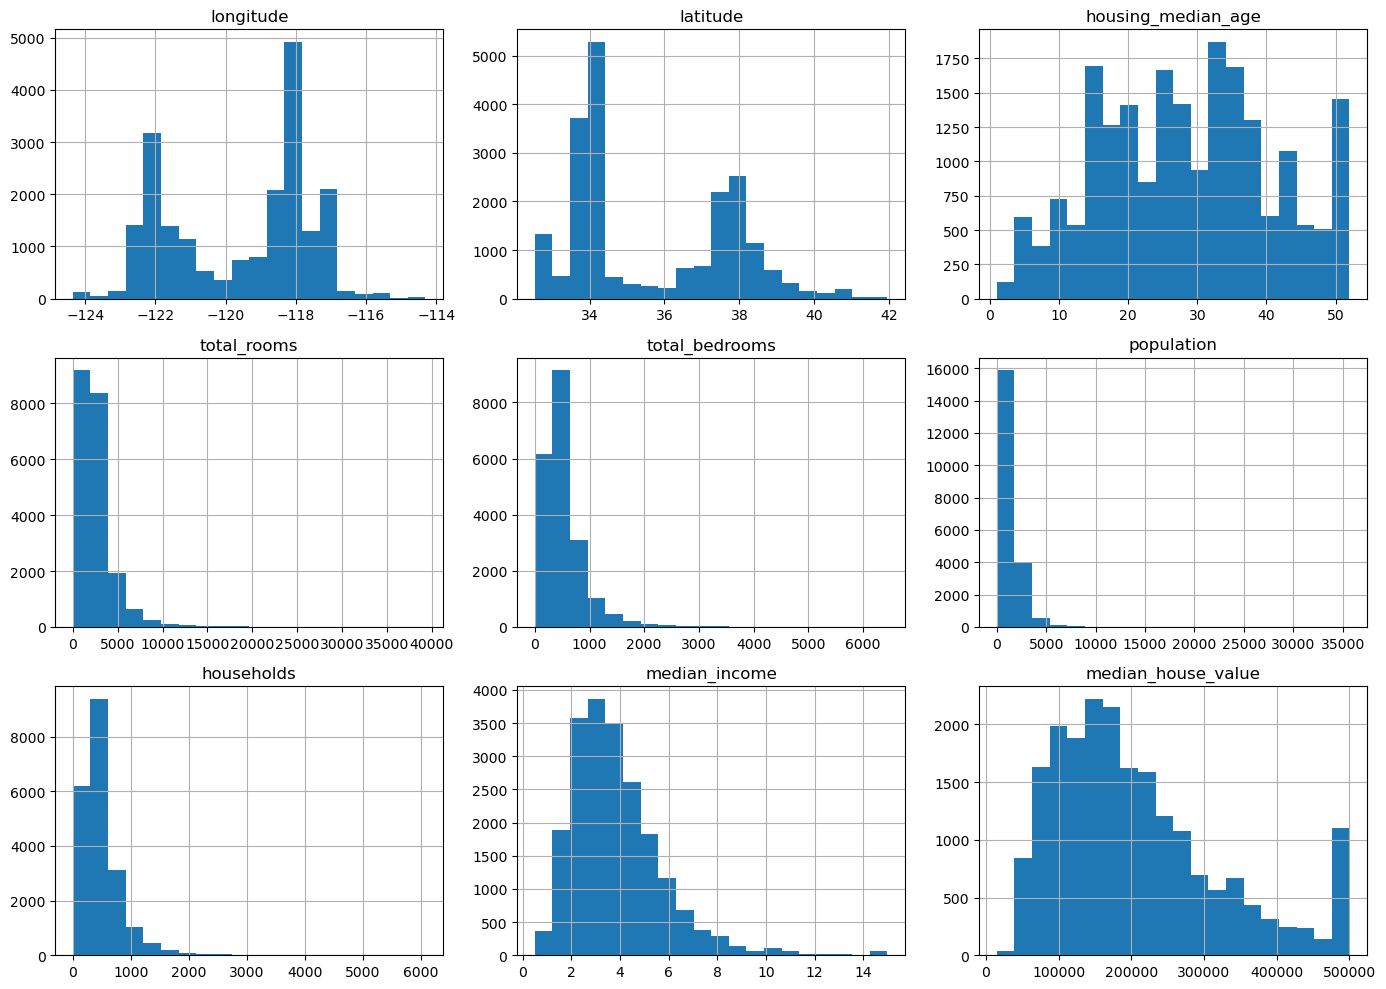

In [38]:
df.hist(figsize=(14, 10), bins=20)
plt.tight_layout()
plt.show()

## Analizar las categorías y la distribución de la variable ocean_proximity.

In [39]:
print(df['ocean_proximity'].value_counts())
print(f"\nNúmero de categorías únicas: {df['ocean_proximity'].nunique()}")

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Número de categorías únicas: 5


## Posibles problemas o peculiaridades de los datos (sesgos, colas largas, variables capadas, etc.).

In [40]:
# 1. Valores Ausentes:
missing_bedrooms = df['total_bedrooms'].isnull().sum()
print(f"Hay {missing_bedrooms} valores ausentes en la columna 'total_bedrooms'.")

# 2. Variables Capped (Topadas):
max_median_house_value = df['median_house_value'].max()
count_max_value = df[df['median_house_value'] == max_median_house_value].shape[0]
print(f"\nLa variable 'median_house_value' está topada en su valor máximo de {max_median_house_value}. Hay {count_max_value} instancias con este valor.")

max_housing_age = df['housing_median_age'].max()
count_max_age = df[df['housing_median_age'] == max_housing_age].shape[0]
print(f"\nLa variable 'housing_median_age' está topada en su valor máximo de {max_housing_age}. Hay {count_max_age} instancias con esta edad.")

# 3. Sesgos y Colas Largas (Skewness):
print("\nVarias variables numéricas como 'total_rooms', 'total_bedrooms', 'population', 'households' y 'median_income' presentan distribuciones sesgadas a la derecha (colas largas), como se puede inferir al comparar la media y la mediana en las estadísticas descriptivas y observar los histogramas.")

# 4. Variable Categórica:
print("\nLa variable 'ocean_proximity' es categórica y necesitará ser codificada.")

Hay 207 valores ausentes en la columna 'total_bedrooms'.

La variable 'median_house_value' está topada en su valor máximo de 500001.0. Hay 965 instancias con este valor.

La variable 'housing_median_age' está topada en su valor máximo de 52.0. Hay 1273 instancias con esta edad.

Varias variables numéricas como 'total_rooms', 'total_bedrooms', 'population', 'households' y 'median_income' presentan distribuciones sesgadas a la derecha (colas largas), como se puede inferir al comparar la media y la mediana en las estadísticas descriptivas y observar los histogramas.

La variable 'ocean_proximity' es categórica y necesitará ser codificada.


# **Enmarcar el problema de Machine Learning**

## Identificar el tipo de problema:
- ¿Supervisado o no supervisado?

**Este un problema de aprendizaje supervisado, pues utilizamos una serie de variables para poder predecir una variable objetivo (median_house_value).**

## Determinar claramente:
- La variable objetivo.
- Las características que usarás para predecirla.

- **Variable objetivo (y): median_house_value, que representa el precio medio de la vivienda en cada distrito del área de California.**

- **Variables predictoras (X): todas las demás columnas del dataset:
longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income y ocean_proximity (tras codificación).**

## Medida de rendimiento adecuada para evaluar el modelo:

**Utilizaremos las métricas de  RMSE y R² para comparar los resultados entre los datos de prueba y los de entrenamiento y obtener si el modelo entrenado se acerca a los resultados de los datos puros.**

- **RMSE mide el error en unidades reales (negocio)**
- **R² mide la capacidad de explicación del modelo (comparación con otros modelos)**

# **Separación de datos**

Para este caso, se utilizará una división aleatoria del 80% para entrenamiento y 20% para pruebas, debido a que:

- Disponemos de un dataset con muchos datos (20.000+)
- Esta división permite poder comparar los resultados estimados del modelo con los de prueba

In [41]:
# Separar variable objetivo y features
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# División aleatoria en train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} filas")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} filas")

Tamaño del conjunto de entrenamiento: 16512 filas
Tamaño del conjunto de prueba: 4128 filas


# **Preparación de los datos**

## Tratar los valores ausentes de manera razonada (por ejemplo, eliminación de filas o imputación con alguna estadística como media, mediana, regresión…).

In [42]:
# Comprobamos qué columnas tienen valores ausentes en TRAIN
print("Valores nulos en X_train antes de imputar:")
print(X_train.isnull().sum())

# Imputación SOLO basada en datos de entrenamiento
median_bedrooms = X_train['total_bedrooms'].median()

# Aplicamos la imputación en train y test
X_train['total_bedrooms'] = X_train['total_bedrooms'].fillna(median_bedrooms)
X_test['total_bedrooms'] = X_test['total_bedrooms'].fillna(median_bedrooms)

print(f"\nMediana usada para imputar 'total_bedrooms': {median_bedrooms}")

print("\nValores nulos en X_train después de imputar:")
print(X_train.isnull().sum())

print("\nValores nulos en X_test después de imputar:")
print(X_test.isnull().sum())

Valores nulos en X_train antes de imputar:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

Mediana usada para imputar 'total_bedrooms': 437.0

Valores nulos en X_train después de imputar:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

Valores nulos en X_test después de imputar:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64


## Codificar la variable categórica ocean_proximity en una representación numérica adecuada para el modelo.

In [43]:
# Creamos el encoder (drop='first' es equivalente al drop_first=True de pandas)
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Ajustamos solo con los datos de entrenamiento
encoder.fit(X_train[['ocean_proximity']])

# Transformamos train y test
ocean_train_encoded = encoder.transform(X_train[['ocean_proximity']])
ocean_test_encoded  = encoder.transform(X_test[['ocean_proximity']])

# Obtener nombres de columnas generadas
cols = encoder.get_feature_names_out(['ocean_proximity'])

# Convertir a DataFrame
ohe_train = pd.DataFrame(ocean_train_encoded, columns=cols, index=X_train.index)
ohe_test  = pd.DataFrame(ocean_test_encoded, columns=cols, index=X_test.index)

# Reemplazar columna original
X_train_final = pd.concat([X_train.drop(columns=['ocean_proximity']), ohe_train], axis=1)
X_test_final  = pd.concat([X_test.drop(columns=['ocean_proximity']), ohe_test], axis=1)

## Valorar si es conveniente escalar o transformar algunas variables (por ejemplo, aquellas que dispongan distribuciones muy sesgadas).

En este caso es conveniente escalar por que los valores entre las diferentes variables son muy diferentes. De no hacerlo, los resultados quedan sesgados por esta diferencia.

In [44]:
# Variables numéricas y variables sesgadas
num_cols = [
    'longitude', 'latitude', 'housing_median_age',
    'total_rooms', 'total_bedrooms', 'population', 'households',
    'median_income'
]

skewed = ['total_rooms', 'total_bedrooms', 'population', 'households']

# Log-transform de las variables sesgadas
offset = 8  # o el valor absoluto mínimo + 1
for col in skewed:
    X_train_final[col] = np.log1p(X_train_final[col] + offset)
    X_test_final[col]  = np.log1p(X_test_final[col] + offset)

# Escalado de todas las variables numéricas
scaler = StandardScaler()
X_train_final[num_cols] = scaler.fit_transform(X_train_final[num_cols])
X_test_final[num_cols]  = scaler.transform(X_test_final[num_cols])

# **Entrenamiento de un modelo base**

## Entrenar un primer modelo de regresión (por ejemplo, una regresión lineal) utilizando las features seleccionadas.

In [45]:
# Crear el modelo
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train_final, y_train)

# Predicciones sobre train y test
y_train_pred = model.predict(X_train_final)
y_test_pred  = model.predict(X_test_final)

## Evaluar el rendimiento del modelo sobre el conjunto de entrenamiento

In [46]:
# Evaluar el rendimiento
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train   = r2_score(y_train, y_train_pred)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test   = r2_score(y_test, y_test_pred)

## Interpretar el significado de la métrica obtenida (RMSE, R² u otras) en el contexto del problema (precio de la vivienda).

In [47]:
# Mostrar resultados
print("=== Rendimiento del modelo de regresión lineal ===\n")
print(f"Train RMSE: {rmse_train:.2f}, R²: {r2_train:.4f}")
print(f"Test  RMSE: {rmse_test:.2f}, R²: {r2_test:.4f}")

=== Rendimiento del modelo de regresión lineal ===

Train RMSE: 65922.28, R²: 0.6749
Test  RMSE: 69025.38, R²: 0.6364


# **Mejoras y experimentación**

# 1. Explorar la relación entre algunas variables y el precio medio de la vivienda

In [48]:
train_data = pd.concat([X_train_final, y_train], axis=1)
print("Combined training data shape:", train_data.shape)

correlation_matrix = train_data.corr(numeric_only=True)
correlation_with_price = correlation_matrix['median_house_value'].sort_values(ascending=False)

print("Correlación con median_house_value:\n", correlation_with_price)

# Excluir la propia variable objetivo de las correlaciones para la selección de top/bottom
top_positive_corr = correlation_with_price[1:3] # Top 2 más correlacionadas positivamente (excluyendo median_house_value itself)
top_negative_corr = correlation_with_price.tail(2) # Top 2 más correlacionadas negativamente

print("\nTop 2 correlaciones positivas:\n", top_positive_corr)
print("\nTop 2 correlaciones negativas:\n", top_negative_corr)


Combined training data shape: (16512, 13)
Correlación con median_house_value:
 median_house_value            1.000000
median_income                 0.690647
ocean_proximity_NEAR BAY      0.162134
total_rooms                   0.158761
ocean_proximity_NEAR OCEAN    0.134263
housing_median_age            0.103706
households                    0.073526
total_bedrooms                0.053173
ocean_proximity_ISLAND        0.020983
population                   -0.023575
longitude                    -0.046349
latitude                     -0.142983
ocean_proximity_INLAND       -0.482862
Name: median_house_value, dtype: float64

Top 2 correlaciones positivas:
 median_income               0.690647
ocean_proximity_NEAR BAY    0.162134
Name: median_house_value, dtype: float64

Top 2 correlaciones negativas:
 latitude                 -0.142983
ocean_proximity_INLAND   -0.482862
Name: median_house_value, dtype: float64


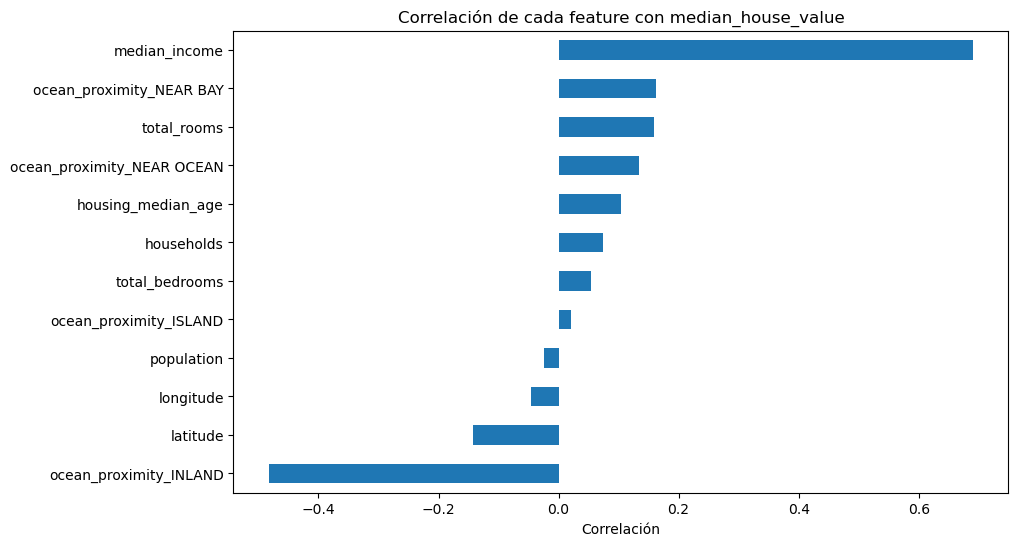

In [49]:
cor_target = correlation_with_price.drop('median_house_value')

plt.figure(figsize=(10, 6))
cor_target.sort_values().plot(kind='barh')
plt.title("Correlación de cada feature con median_house_value")
plt.xlabel("Correlación")
plt.show()

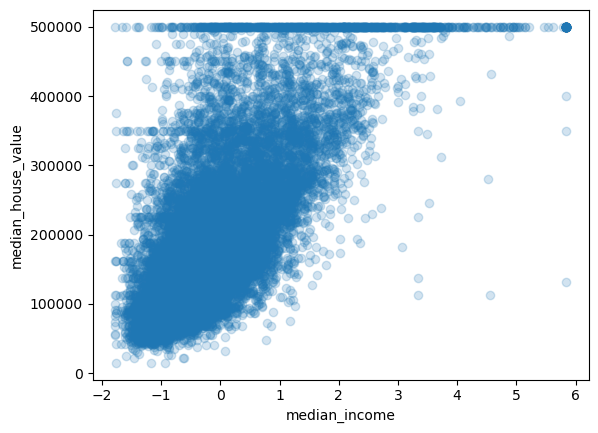

In [50]:
plt.scatter(train_data['median_income'], train_data['median_house_value'], alpha=0.2)
plt.xlabel("median_income")
plt.ylabel("median_house_value")
plt.show()

## Nuevas combinaciones de características o transformaciones (feature engineering) que puedan mejorar las predicciones.

In [51]:
for df_ in [X_train_final, X_test_final]:
    # Proporciones derivadas
    df_['rooms_per_household'] = df_['total_rooms'] / (df_['households'] + 1e-6)
    df_['bedrooms_per_room'] = df_['total_bedrooms'] / (df_['total_rooms'] + 1e-6)
    df_['population_per_household'] = df_['population'] / (df_['households'] + 1e-6)

    # Score de proximidad al océano
    df_['coast_proximity_score'] = (
        df_.get('ocean_proximity_NEAR BAY', 0) * 2 +
        df_.get('ocean_proximity_NEAR OCEAN', 0) * 3 -
        df_.get('ocean_proximity_INLAND', 0) * 2
    )

# Clusters geográficos (solo con training set para evitar fugas)
from sklearn.cluster import KMeans
geo_features = ['latitude', 'longitude']
kmeans = KMeans(n_clusters=5, random_state=42)
X_train_final['geo_cluster'] = kmeans.fit_predict(X_train_final[geo_features])
X_test_final['geo_cluster']  = kmeans.predict(X_test_final[geo_features])

In [52]:
new_features = ['rooms_per_household', 'bedrooms_per_room', 'population_per_household',
                'coast_proximity_score', 'geo_cluster']

# StandardScaler
X_train_final[new_features] = scaler.fit_transform(X_train_final[new_features])
X_test_final[new_features]  = scaler.transform(X_test_final[new_features])

In [53]:
# Concatenar con la variable objetivo
train_data_fe = pd.concat([X_train_final, y_train], axis=1)

# Calcular matriz de correlaciones
correlation_matrix_fe = train_data_fe.corr(numeric_only=True)
correlation_with_price_fe = correlation_matrix_fe['median_house_value'].sort_values(ascending=False)

# Mostrar top correlaciones (mostrar suficientes filas para incluir todas las nuevas features)
print("Top correlaciones tras feature engineering:\n")
print(correlation_with_price_fe.head(20))

Top correlaciones tras feature engineering:

median_house_value            1.000000
median_income                 0.690647
coast_proximity_score         0.405880
ocean_proximity_NEAR BAY      0.162134
total_rooms                   0.158761
ocean_proximity_NEAR OCEAN    0.134263
housing_median_age            0.103706
households                    0.073526
total_bedrooms                0.053173
ocean_proximity_ISLAND        0.020983
population_per_household      0.011281
bedrooms_per_room             0.000860
rooms_per_household          -0.019342
population                   -0.023575
longitude                    -0.046349
latitude                     -0.142983
geo_cluster                  -0.178055
ocean_proximity_INLAND       -0.482862
Name: median_house_value, dtype: float64


## Probar algún otro modelo de regresión polinómica con distintos grados y transformaciones de las variables. Evalúa el rendimiento del modelo.

In [54]:
features_poly = [
    'median_income',
    'coast_proximity_score',
    'geo_cluster',
    'rooms_per_household',
    'bedrooms_per_room',
    'population_per_household'
]

degrees = [2, 3]

for deg in degrees:
    print(f"\n--- Regresión polinómica grado {deg} ---")

    # Crear features polinómicas
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_final[features_poly])
    X_test_poly  = poly.transform(X_test_final[features_poly])

    # Modelo lineal sobre features polinómicas
    model_poly = LinearRegression()
    model_poly.fit(X_train_poly, y_train)

    # Predicciones
    y_train_pred = model_poly.predict(X_train_poly)
    y_test_pred  = model_poly.predict(X_test_poly)

    # Evaluación
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train   = r2_score(y_train, y_train_pred)

    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test   = r2_score(y_test, y_test_pred)

    print(f"Train RMSE: {rmse_train:.2f}, R²: {r2_train:.4f}")
    print(f"Test  RMSE: {rmse_test:.2f}, R²: {r2_test:.4f}")


--- Regresión polinómica grado 2 ---
Train RMSE: 73419.91, R²: 0.5968
Test  RMSE: 74146.40, R²: 0.5805

--- Regresión polinómica grado 3 ---
Train RMSE: 72029.31, R²: 0.6119
Test  RMSE: 85163.94, R²: 0.4465


# **Evaluación final y conclusiones**

## Evaluar el mejor modelo sobre el conjunto de prueba.

In [55]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_final[features_poly])
X_test_poly  = poly.transform(X_test_final[features_poly])

model_poly2 = LinearRegression()
model_poly2.fit(X_train_poly, y_train)

# Predicciones
y_test_pred_poly2 = model_poly2.predict(X_test_poly)

# Métricas
rmse_test_poly2 = np.sqrt(mean_squared_error(y_test, y_test_pred_poly2))
r2_test_poly2   = r2_score(y_test, y_test_pred_poly2)

print("=== Mejor modelo (Polinómico grado 2) sobre Test ===")
print(f"Test RMSE: {rmse_test_poly2:.2f}")
print(f"Test R²: {r2_test_poly2:.4f}")

=== Mejor modelo (Polinómico grado 2) sobre Test ===
Test RMSE: 74146.40
Test R²: 0.5805


## Comparar su rendimiento con el modelo base.

In [56]:
features_selected = [
    'median_income',
    'coast_proximity_score',
    'geo_cluster',
    'rooms_per_household',
    'bedrooms_per_room',
    'population_per_household'
]

X_train_sel = X_train_final[features_selected]
X_test_sel  = X_test_final[features_selected]

model_linear_sel = LinearRegression()
model_linear_sel.fit(X_train_sel, y_train)

y_test_pred_linear = model_linear_sel.predict(X_test_sel)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_test_pred_linear))
r2_linear   = r2_score(y_test, y_test_pred_linear)

print("=== Modelo Lineal (subset de features) ===")
print(f"Test RMSE: {rmse_linear:.2f}")
print(f"Test R²: {r2_linear:.4f}")

poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly2 = poly2.fit_transform(X_train_sel)
X_test_poly2  = poly2.transform(X_test_sel)

model_poly2 = LinearRegression()
model_poly2.fit(X_train_poly2, y_train)

y_test_pred_poly2 = model_poly2.predict(X_test_poly2)
rmse_poly2 = np.sqrt(mean_squared_error(y_test, y_test_pred_poly2))
r2_poly2   = r2_score(y_test, y_test_pred_poly2)

print("\n=== Regresión Polinómica grado 2 ===")
print(f"Test RMSE: {rmse_poly2:.2f}")
print(f"Test R²: {r2_poly2:.4f}")

=== Modelo Lineal (subset de features) ===
Test RMSE: 75807.24
Test R²: 0.5615

=== Regresión Polinómica grado 2 ===
Test RMSE: 74146.40
Test R²: 0.5805


## Resumir las principales conclusiones a las que has llegado analizando los datos y realizando las predicciones.

- **Las features más predictivas** fueron `median_income`, `coast_proximity_score` y `geo_cluster`.
- **El modelo lineal** sobre estas features ya captura gran parte de la varianza.
- **La regresión polinómica grado 2** mejora ligeramente R² y reduce RMSE respecto al lineal, capturando interacciones no lineales.
- **La regresión polinómica grado 3** (probada anteriormente) sobreajusta y empeora la generalización.